In [1]:
240 * 65 / 1000

15.6

In [2]:
14 * 1000 / 240

58.333333333333336

In [3]:
import pandas as pd
from configurator import Config
from matplotlib.pyplot import gca, subplot, figure
from matplotlib.gridspec import GridSpec
from matplotlib.dates import DateFormatter
from common import root_from

In [4]:
config = Config.from_path('config.yaml')
root = root_from(config)

In [5]:
def lines(ax):
    ax.axhline(y=240 * 65 / 1000, color='grey', linestyle='dashed', label='65A')
    ax.axhline(y=7.5, color='grey', linestyle='dotted', label='7.5kW')

In [6]:
DEFAULT_ZAPPI_FIELDS = ('gep', 'gen', 'imp', 'h1b')

def plot_zappi_date(date, ax=None, fields=DEFAULT_ZAPPI_FIELDS):
    ax = ax or gca()
    ax.set_title(date.strftime('myenergi: %a %d %b %Y'))
    path = root / date.strftime('zappi-%Y-%m-%d.csv')
    if path.exists():
        zappi_data = pd.read_csv(path, index_col='datetime', parse_dates=[0])
        zappi_data = zappi_data.reindex(
            index=pd.date_range(
                start=zappi_data.index.min(),
                end=zappi_data.index.max(),
                freq='1 min'
            ),
        )
        if fields is None:
            zappi_data.plot(ax=ax)
        else:
            for field in fields:
                ax.plot(zappi_data[f'{field}_kw'], label=f'{field} (kw)')
    lines(ax)
    ax.legend()
    if fields is not None:
        ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))

In [7]:
def plot_tesla_date(date, ax=None, abs=True):
    date = pd.Timestamp(date)
    tesla_data = pd.read_csv(root / date.strftime('tesla-%Y-%m-%d.csv'), index_col='timestamp', parse_dates=[0])
    ax = ax or gca()
    ax.set_title(date.strftime('Tesla: %a %d %b %Y'))
    lines(ax)
    ax.legend()
    tesla_kw = (tesla_data / 1000)
    if abs:
        tesla_kw = tesla_kw.abs().rename(columns=lambda name: f'abs({name})')
    for col in tesla_kw:
        ax.plot(tesla_kw[col], label=col)
    ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
    ax.legend()

In [8]:
def make_gs(rows: int):
    fig = figure(figsize=(16, rows*32/5), dpi=70)
    fig.set_facecolor('white')
    gs = GridSpec(rows, 2)
    gs.update(hspace=0.3)
    return gs

def plot_date(dt, gs=None, i=0, *, tesla_day_offset=0, tesla_abs=True):
    if isinstance(dt, str):
        dt = pd.Timestamp(dt)
    if gs is None:
        gs = make_gs(rows=1)
    ax = subplot(gs[i, 0])
    plot_zappi_date(dt, ax)
    ax = subplot(gs[i, 1], sharey=ax, sharex=ax)
    plot_tesla_date(dt + pd.Timedelta(days=tesla_day_offset), ax, abs=tesla_abs)

def plot_zappi(dt, figsize=(16, 16), log=False, fields=DEFAULT_ZAPPI_FIELDS):
    if isinstance(dt, str):
        dt = pd.Timestamp(dt)
    fig = figure(figsize=figsize, dpi=70)
    fig.set_facecolor('white')
    ax = fig.add_subplot(111)
    if log:
        ax.set_yscale("log")
    plot_zappi_date(dt, ax, fields=fields)    

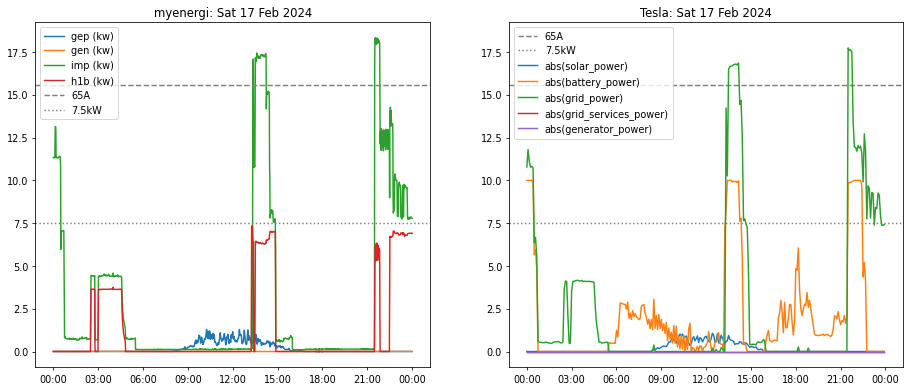

In [9]:
plot_date('2024-02-17')

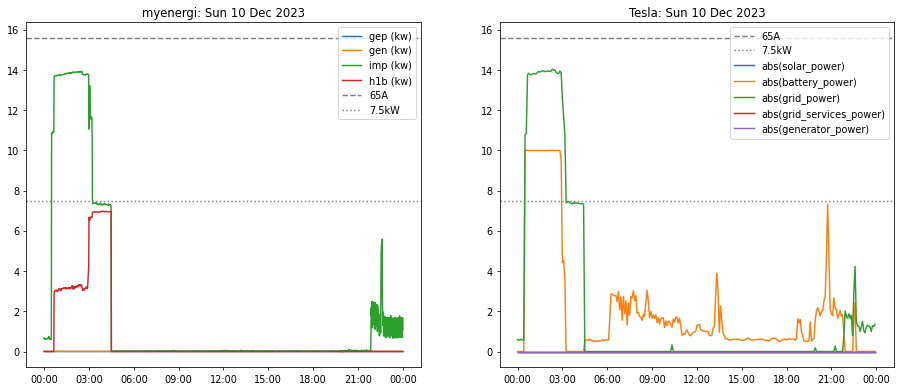

In [10]:
plot_date('2023-12-10')

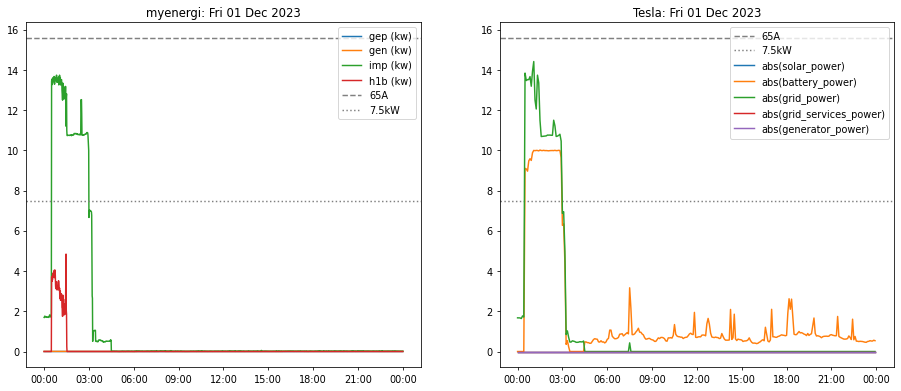

In [11]:
plot_date('2023-12-01')

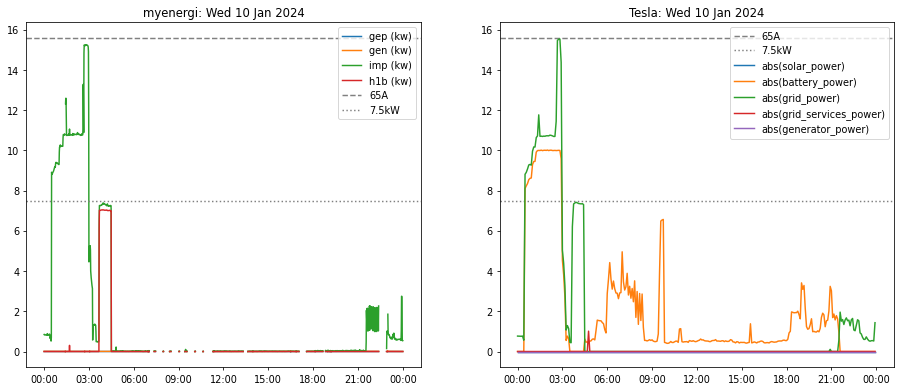

In [12]:
plot_date('2024-01-10')

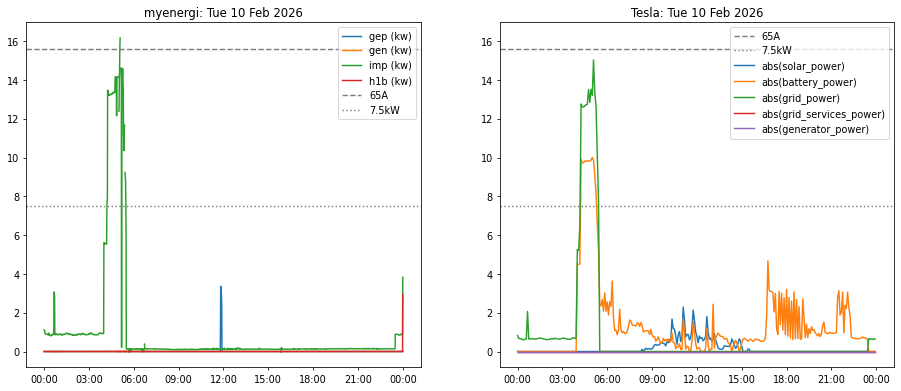

In [13]:
plot_date('2026-02-10')

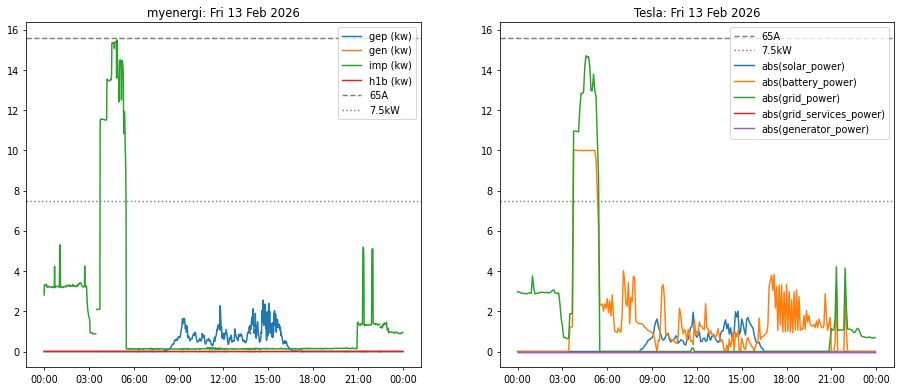

In [14]:
plot_date('2026-02-13')

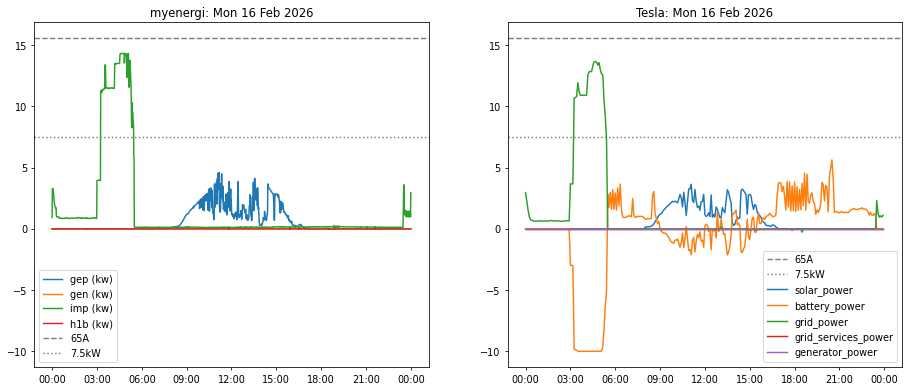

In [20]:
plot_date('2026-02-16', tesla_abs=False)

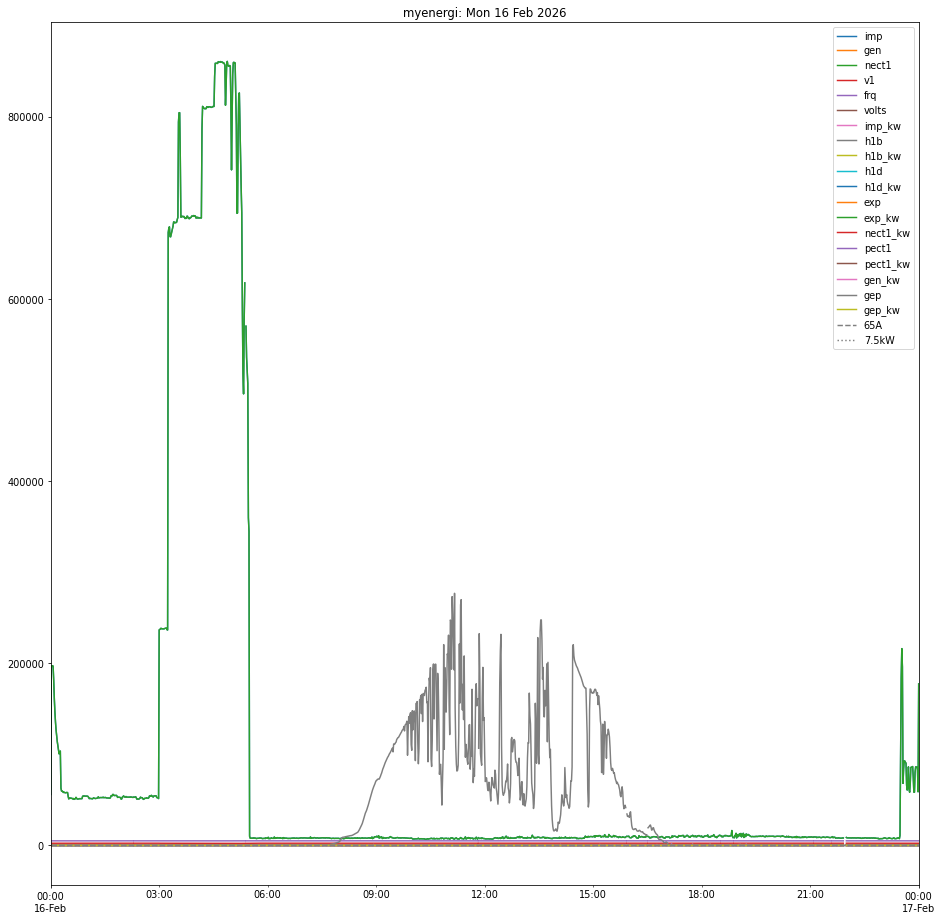

In [21]:
plot_zappi('2026-02-16', fields=None)